### CS156 Week #8 Assignment 

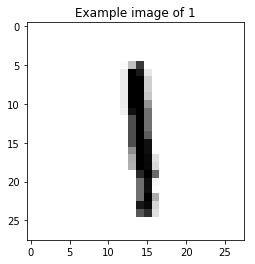

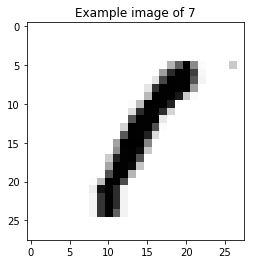

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn.datasets import fetch_mldata
from sklearn import svm, metrics, datasets
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

#Coverting the data into a dataframe to find the class of "1" and "7"
data = pd.DataFrame(data= np.c_[mnist['data'], mnist['target']])
data1 = data.loc[data[784] == 1]
data7 = data.loc[data[784] == 7]
dataset = pd.concat([data1, data7], ignore_index=True)

#Separating the data and the lables
X = dataset.drop(784, axis=1)
y = dataset[784]

#Plotting images from the data
%matplotlib inline
plt.figure(1)
img1 = np.array(X.iloc[[2]]).reshape(28,28)
plt.imshow(img1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Example image of 1")

plt.figure(2)
img7 = np.array(X.iloc[[80]]).reshape(28,28)
plt.imshow(img7, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Example image of 7")

plt.show()


In [2]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 123456)

######Linear Kernal
t1 = time.time()
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(train_x,train_y)
predictions1 = linear_svc.predict(test_x)

t12 = time.time()
run_time = t12 - t1
print('SV with Linear Kernal run in %.3f s' % run_time)
print metrics.classification_report(test_y, predictions1)
print "The accuracy is: ", linear_svc.score(test_x, test_y)

######Polynomial Kernal
t2 = time.time()
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(train_x,train_y)
predictions2 = poly_svc.predict(test_x)

t22 = time.time()
run_time = t22 - t2
print('SV with Polinomial Kernal run in %.3f s' % run_time)
print metrics.classification_report(test_y, predictions2)
print "The accuracy is: ", poly_svc.score(test_x, test_y)

######rbf kernal 
t3 = time.time()
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(train_x,train_y)
predictions3 = rbf_svc.predict(test_x)

t32 = time.time()
run_time = t32 - t3
print('SV with rbf Kernal run in %.3f s' % run_time)
print metrics.classification_report(test_y, predictions3)
print "The accuracy is: ", rbf_svc.score(test_x, test_y)



SV with Linear Kernal run in 3.001 s
             precision    recall  f1-score   support

        1.0       0.99      1.00      1.00      1545
        7.0       1.00      0.99      1.00      1489

avg / total       1.00      1.00      1.00      3034

The accuracy is:  0.995715227423
SV with Polinomial Kernal run in 4.243 s
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00      1545
        7.0       1.00      1.00      1.00      1489

avg / total       1.00      1.00      1.00      3034

The accuracy is:  0.996374423204
SV with rbf Kernal run in 350.208 s
             precision    recall  f1-score   support

        1.0       0.51      1.00      0.67      1545
        7.0       0.00      0.00      0.00      1489

avg / total       0.26      0.51      0.34      3034

The accuracy is: 

/Users/work_account/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.509228740936




Polynomial and Linear Kernals both yield pretty decent accuracies and precisions, and on top of that, didn't take too much time to run. RBF kernal performed rather poorly with this SVM classification, both in terms of accuracy (only around 50%) and time (over 350 seconds). 